ASSIGNMENT 3

NAME: Seshadri Sriya                    
REG NO:20BIT0172

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_recall_fscore_support,f1_score,roc_curve,classification_report

In [2]:
df=pd.read_csv('Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000  7420         4          2        3      yes        no       no  \
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


Univariate Analysis

C:\Users\sriya\AppData\Local\Temp\ipykernel_20516\3791755710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathrooms'])


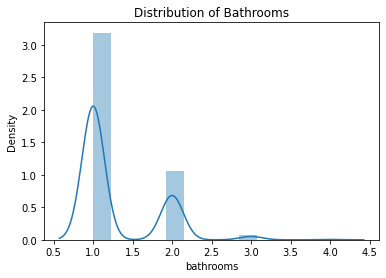

In [3]:
sns.distplot(df['bathrooms'])
plt.title('Distribution of Bathrooms')
plt.show()

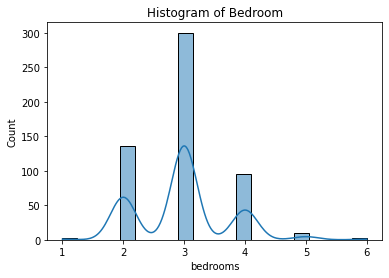

In [4]:
sns.histplot(df['bedrooms'], kde=True)
plt.title('Histogram of Bedroom')
plt.show()

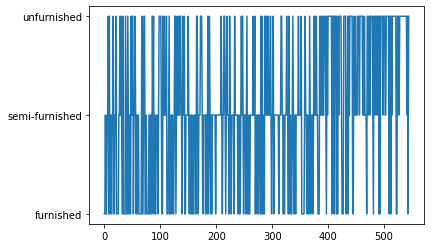

In [5]:
plt.plot(df.furnishingstatus)

Bivariate Analysis

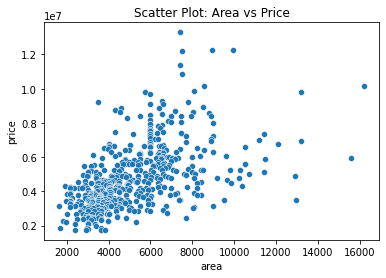

In [6]:
sns.scatterplot(x='area', y='price', data=df)
plt.title('Scatter Plot: Area vs Price')
plt.show()

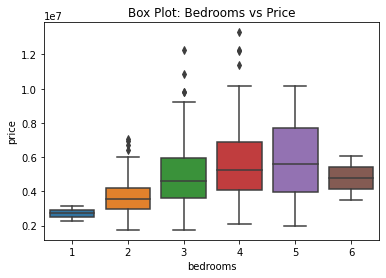

In [7]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Box Plot: Bedrooms vs Price')
plt.show()

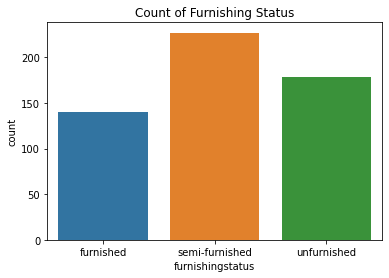

In [8]:
sns.countplot(x='furnishingstatus', data=df)
plt.title('Count of Furnishing Status')
plt.show()

Multi Variate Analysis

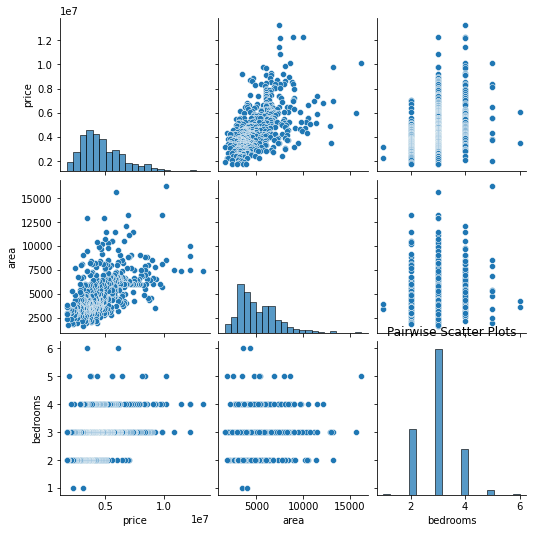

In [9]:
sns.pairplot(df[['price', 'area', 'bedrooms']])
plt.title('Pairwise Scatter Plots')
plt.show()

C:\Users\sys\AppData\Local\Temp\ipykernel_21316\2121121069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


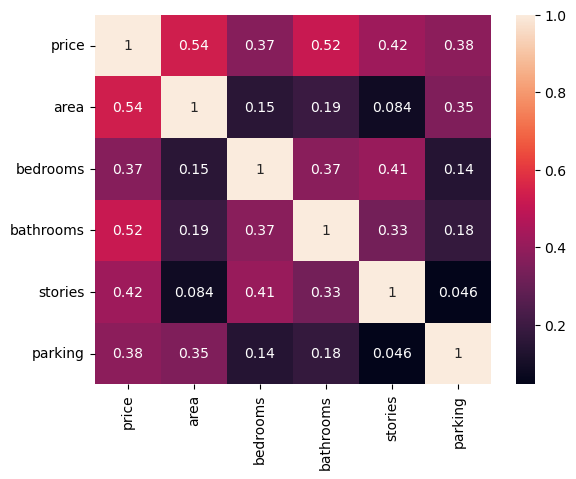

In [12]:
sns.heatmap(df.corr(),annot = True)
plt.show()

Descriptive Statisctics

In [13]:
df['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

In [14]:
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [15]:
df.mean()

C:\Users\sys\AppData\Local\Temp\ipykernel_21316\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [16]:
df.median()

C:\Users\sys\AppData\Local\Temp\ipykernel_21316\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [17]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.skew()

C:\Users\sys\AppData\Local\Temp\ipykernel_21316\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

In [19]:
df.kurt()

C:\Users\sys\AppData\Local\Temp\ipykernel_21316\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

In [20]:
df['stories'].std()

0.8674924629255298

In [21]:
df['stories'].var()

0.7525431732326017

In [22]:
print("Min")
df['price'].min()

Min


1750000

In [23]:
print("Max")
df['price'].max()

Max


13300000

In [24]:
quantile=df.quantile(q=[0.75,0.25])
quantile

C:\Users\sys\AppData\Local\Temp\ipykernel_21316\3599453113.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantile=df.quantile(q=[0.75,0.25])


,price,area,bedrooms,bathrooms,stories,parking
0.75,5740000.0,6360.0,3.0,2.0,2.0,1.0
0.25,3430000.0,3600.0,2.0,1.0,1.0,0.0


In [25]:
IQR=quantile.iloc[0]-quantile.iloc[1]
IQR

price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            1.0
dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scale=StandardScaler()

In [28]:
x=df[['price','area']]
x.head()   

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [29]:
st_scale=scale.fit_transform(x)
st_scale

array([[ 4.56636513,  1.04672629],
       [ 4.00448405,  1.75700953],
       [ 4.00448405,  2.21823241],
       ...,
       [-1.61432675, -0.70592066],
       [-1.61432675, -1.03338891],
       [-1.61432675, -0.5998394 ]])

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min_max=MinMaxScaler()

In [32]:
norm=min_max.fit_transform(x)
norm

array([[1.        , 0.39656357],
       [0.90909091, 0.5024055 ],
       [0.90909091, 0.57113402],
       ...,
       [0.        , 0.13539519],
       [0.        , 0.08659794],
       [0.        , 0.15120275]])

In [33]:
from sklearn.preprocessing import RobustScaler

In [34]:
rscale=RobustScaler()

In [35]:
rs=rscale.fit_transform(x)
rs

array([[ 3.87878788,  1.02173913],
       [ 3.42424242,  1.57971014],
       [ 3.42424242,  1.94202899],
       ...,
       [-1.12121212, -0.35507246],
       [-1.12121212, -0.61231884],
       [-1.12121212, -0.27173913]])

 Check for Missing values and deal with them.

In [36]:
missing_values = df.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [37]:
data_cleaned=df.dropna()
data_cleaned

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [38]:
data_imputed=df.fillna(df.mean())
data_imputed

C:\Users\sys\AppData\Local\Temp\ipykernel_21316\2066124165.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed=df.fillna(df.mean())


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


MULTI LINEAR REGRESSION

In [39]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [41]:
df.shape

(545, 12)

In [42]:
df.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

In [43]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
df.mainroad=le.fit_transform(df.mainroad)
df.guestroom=le.fit_transform(df.guestroom)
df.basement=le.fit_transform(df.basement)
df.hotwaterheating=le.fit_transform(df.hotwaterheating)
df.airconditioning=le.fit_transform(df.airconditioning)
df.furnishingstatus=le.fit_transform(df.furnishingstatus)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [45]:
#Split dataset into independent and dependent variables

In [46]:
x=df.iloc[:,1:]
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,0
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,0
4,7420,4,1,2,1,1,1,0,1,2,0


In [47]:
y=df.iloc[:,0:1]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [48]:
#Scaling Independent variables
from sklearn.preprocessing import StandardScaler
name=x.columns

In [49]:
scale=StandardScaler()

In [50]:
x=scale.fit_transform(x)
x

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.4726183 ,
         1.51769249, -1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  1.4726183 ,
         2.67940935, -1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ..., -0.67906259,
         1.51769249, -0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.67906259,
        -0.80574124,  1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.80574124, -1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.80574124,  1.22296203]])

In [51]:
x=pd.DataFrame(x,columns=name)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,-1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-1.406286
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.091662
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,-1.406286
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.222962
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,1.222962
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-1.406286


In [52]:
#Splitting the dataset into training and test

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 11)
(164, 11)
(381, 1)
(164, 1)


In [55]:
#Model Building
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [56]:
#Train the model
model.fit(x_train,y_train)

LinearRegression()

In [57]:
#Test the model
y_pred=model.predict(x_test)
y_pred

array([[ 4089549.34146582],
       [ 5931231.16035226],
       [ 4532244.89965943],
       [ 7787378.34654739],
       [ 2886031.9640842 ],
       [ 7304525.1193173 ],
       [ 3321501.37715424],
       [ 3115332.45821448],
       [ 2877622.01097107],
       [ 8582192.91976517],
       [ 6848812.74809022],
       [ 3886312.95406924],
       [ 3960226.81955008],
       [ 4975521.31440385],
       [ 4259868.97505694],
       [ 1949719.63067729],
       [ 4221402.2773664 ],
       [ 3805276.67432391],
       [ 3279128.51848235],
       [ 4720335.82776393],
       [ 6306683.67404967],
       [ 6749571.71139957],
       [ 4819257.69116812],
       [ 2748879.33759814],
       [ 4996653.51190627],
       [ 5994285.69821221],
       [ 4934762.93876526],
       [ 5656032.72754902],
       [ 5868118.16606042],
       [ 5507758.87275314],
       [ 3376865.09972269],
       [ 5640311.34572561],
       [ 6848972.9190782 ],
       [ 3029201.03529964],
       [ 4460111.44049556],
       [ 5224712.307

In [58]:
y_test

,price
239,4585000
113,6083000
325,4007500
66,6930000
479,2940000
...,...
477,2940000
505,2653000
347,3836000
224,4760000


In [59]:
# Measure the performance using Metrics
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)*100
acc

63.82187269539132

In [60]:
error= y_test-y_pred
error

,price
239,4.954507e+05
113,1.517688e+05
325,-5.247449e+05
66,-8.573783e+05
479,5.396804e+04
...,...
477,-1.615629e+05
505,-1.634861e+06
347,6.134362e+05
224,-1.119554e+06


In [61]:
se=error*error
se

,price
239,2.454714e+11
113,2.303378e+10
325,2.753572e+11
66,7.350976e+11
479,2.912549e+09
...,...
477,2.610256e+10
505,2.672772e+12
347,3.763040e+11
224,1.253401e+12


In [62]:
mse=np.mean(se)
mse

c:\Users\sys\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


price    1.020620e+12
dtype: float64

In [63]:
mse2=mean_squared_error(y_test,y_pred)
mse2

1020620359783.1227